In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [4]:
customers = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\customers.csv')
transactions = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\transactions.csv')

In [5]:
credit_applications = transactions.groupby(['customerID'], as_index=False).agg({'transactionID':'max'})

new_trans = credit_applications.merge(transactions[['transactionID','price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4']], on='transactionID', how='left')

# Join transactions df with customers df on customerID
df = pd.merge(new_trans, customers, on='customerID', how='left')

# Replace missing Income values with 999
df['income'] = df['income'].fillna(999)

df['trans_price_avg_lst3'] = df.groupby('customerID')['price'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)


In [6]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0


In [30]:
X = df[[ 'price', 'sex', 'age', 'income','trans_price_avg_lst3']]

In [31]:
X = X.sample(5000)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

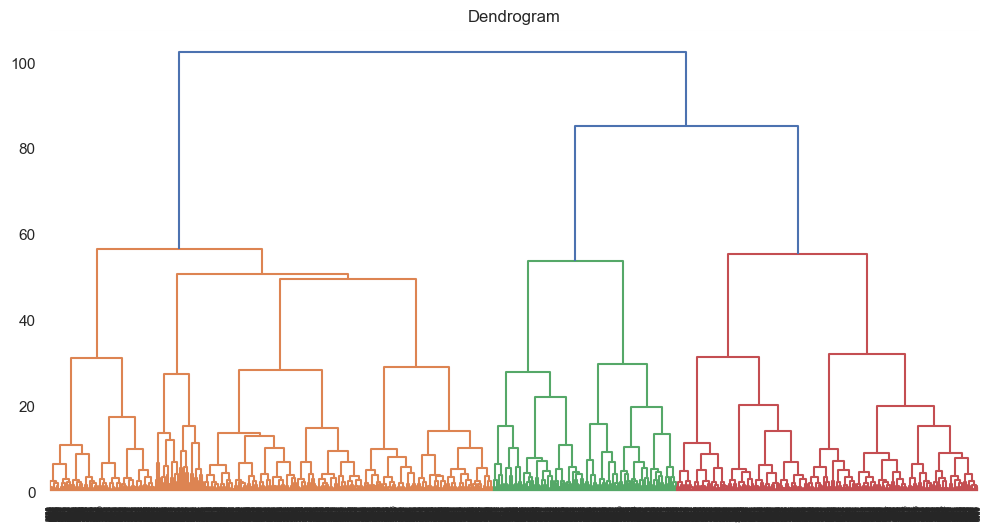

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,6))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y = cluster.fit_predict(x_scaled)


In [32]:
X['Default'] = y
X

,price,sex,age,income,trans_price_avg_lst3,Default
378084,53,1,45,19700.0,53.0,0
380392,155,1,58,49100.0,155.0,0
255074,35,2,52,35500.0,35.0,1
149496,174,1,22,35100.0,174.0,0
490191,102,1,32,27000.0,102.0,2
...,...,...,...,...,...,...
381729,61,1,24,79200.0,61.0,2
238147,167,1,48,89000.0,167.0,1
20512,27,2,67,79200.0,27.0,1
205873,115,2,63,6200.0,115.0,0


In [36]:
cluster_means = X.groupby('Default').mean()

In [37]:
cluster_means

,price,sex,age,income,trans_price_avg_lst3
Default,,,,,
0,102.909661,1.153492,44.578837,49109.722292,102.909661
1,101.406654,1.154652,44.748614,48945.757240,101.406654
2,97.421907,1.173428,45.184584,49225.335700,97.421907
